In [1]:
print("Hello World")

Hello World


In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
len(gpus)

0

In [5]:
import cv2
import imghdr

C:\Users\royka\AppData\Local\Temp\ipykernel_19344\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = "D:\\Programming\\PythonProject\\accessoriesclassify\\pc_parts"

In [7]:
img_exts = ['jpeg','jpg','bmp','png']

In [8]:
os.listdir(os.path.join(data_dir,'cables'))

['1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in the ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3279 files belonging to 14 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next() #gets a certain amount of batch and loads in the batch variable

In [15]:
len(batch)

2

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[0]

array([[[[252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.],
         ...,
         [252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.]],

        [[252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.],
         ...,
         [252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.]],

        [[252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.],
         ...,
         [252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.]],

        ...,

        [[252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.],
         ...,
         [186., 204., 156.],
         [176., 194., 146.],
         [187., 205., 155.]],

        [[252., 235., 219.],
         [252., 235., 219.],
         [252., 235., 219.],
         ...,
         [176., 194., 144.],
         [180., 198., 148.],
         [176., 194., 142.]],

        [[252., 235., 219.],
       

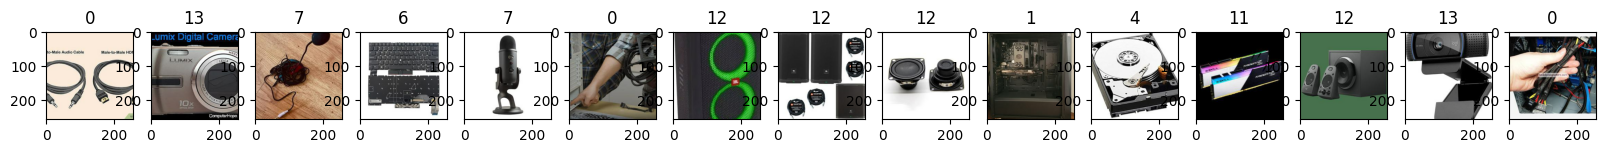

In [18]:
fig , ax = plt.subplots(ncols = 15 , figsize=(20,20))
for idx,img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# PRE-PROCESSING

In [19]:
#Scaling the data 
data = data.map(lambda x,y: (x/255, y)) #x->image y->labels

In [20]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

In [23]:
len(batch)

2

In [24]:
batch[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99215686, 0.99215686, 0.9843137 ],
         [0.99215686, 0.99215686, 0.9843137 ],
         [0.99215686, 0.99215686, 0.9843137 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        ...,

        [[0.9843137 , 1.        , 1.        ],
         [0.9843137 , 1.        , 1.        ]

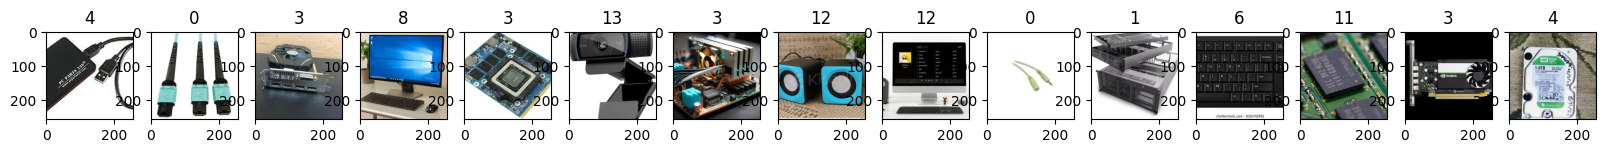

In [25]:
fig , ax = plt.subplots(ncols = 15 , figsize=(20,20))
for idx,img in enumerate(batch[0][:15]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [26]:
len(data)

103

In [27]:
train_size = int(len(data)*.75)
test_size = int(len(data)*.25)

In [29]:
train_size

77

In [30]:
test_size

25

In [31]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [32]:
val_split = int(train_size*0.1)
validation = train.take(val_split)
train = train.skip(val_split)

In [33]:
len(train)

70

In [34]:
len(test)

25

In [35]:
len(validation)

7

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [38]:
model1 = Sequential()